In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

from keras.layers import Dense
from keras.models import Sequential
from sklearn.metrics import classification_report
from tensorflow.examples.tutorials.mnist import input_data

Using TensorFlow backend.


In [2]:
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
print("features:", mnist.train.images.shape, "\tlabels:", mnist.train.labels.shape)

features: (55000, 784) 	labels: (55000, 10)


In [4]:
# Numero de inputs será o numero referente às dimenções da imagem (784 = 28x28).
num_input = mnist.train.images.shape[1]
num_out = mnist.train.labels.shape[1]

batch_size = 512
display_step = 5
learning_rate = 0.002
epochs = 30
num_hidden = 16

<h1>TensorFlow</h1>

In [5]:
# O reset_default_graph é passado para apagar o grafo e seus pesos antes de rodar o modelo novamente. 
# O reset_default_graph não funciona corretamente para o Keras.

tf.reset_default_graph()
X = tf.placeholder(tf.float32, [None, num_input], name="X")
Y = tf.placeholder(tf.float32, [None, num_out], name="y")


pesos = {"fc_1": tf.Variable(tf.truncated_normal([num_input, num_hidden], stddev=0.2), name="fc_1"),
        "fc_2": tf.Variable(tf.truncated_normal([num_hidden, num_hidden * 2], stddev=0.2), name='fc_2'),
        "fc_3": tf.Variable(tf.truncated_normal([num_hidden * 2, num_out], stddev=0.2), name='fc_3')}

bias  = {"b_1": tf.Variable(tf.zeros(shape=[num_hidden]), name='b_1'),
        "b_2": tf.Variable(tf.zeros(shape=[num_hidden * 2]), name="b_2"),
        "b_3": tf.Variable(tf.zeros(shape=[num_out]), name="b_3")}

with tf.name_scope("Dense_1"):
    dense_1 = tf.matmul(X, pesos["fc_1"])
    dense_1 = tf.add(dense_1, bias["b_1"])
    dense_1 = tf.nn.relu(dense_1, name="Dense_1")
    
with tf.name_scope("Dense_2"):
    dense_2 = tf.matmul(dense_1, pesos["fc_2"])
    dense_2 = tf.add(dense_2, bias["b_2"])
    dense_2 = tf.nn.relu(dense_2, name="Dense_2")

with tf.name_scope("Output"):
    logits = tf.matmul(dense_2, pesos["fc_3"])
    logits = tf.add(logits, bias["b_3"])
    output = tf.nn.softmax(logits, name="Output")

Instructions for updating:
Colocations handled automatically by placer.


In [6]:
with tf.name_scope('Loss'):
    # Calculo de loss
    loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=Y))
    
    # Backpropagation
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
    train_op = optimizer.minimize(loss_op)

with tf.name_scope("accuracy"):
    # Calculo de precisão.
    correct_prediction = tf.equal(tf.argmax(output, 1), tf.argmax(Y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [7]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
        sess.run(init)
        
        # Calculo para o numero de loops para ser completado uma época (epoch).
        num_batchs = mnist.train.num_examples // batch_size
        
        list_loss_train = []
        list_loss_eval = []
        for epoch in range(epochs+1):
            
            # for para percorrer todas as possibilidades de batch dentro do dataset.
            for _ in range(num_batchs):
                X_train, y_train = mnist.train.next_batch(batch_size)
                X_eval, y_eval = mnist.validation.next_batch(batch_size)
                
                # O treinamento é realizado quando iniciado a sessão passando o train_op.
                _, loss_train, accuracy_train = sess.run([train_op, loss_op, accuracy],
                                                         feed_dict={X:X_train ,Y:y_train})            
                loss_eval, accuracy_eval = sess.run([loss_op, accuracy],
                                     feed_dict={X:X_eval, Y:y_eval})
                
                list_loss_eval.append(loss_eval)
                list_loss_train.append(loss_train)
                 
            if epoch % display_step == 0:
                print("Epoch: {} \ttrain - Loss: {:.3f} Acc: {:.2f}% \tValidate - Loss: {:.3f} Acc: {:.2f}%".format(
                epoch, loss_train, accuracy_train * 100, loss_eval, accuracy_eval * 100))
                
        X_test = mnist.test.images
        y_test = mnist.test.labels
        predict = sess.run(output, feed_dict={X:X_test})

Epoch: 0 	train - Loss: 0.434 Acc: 87.30% 	Validate - Loss: 0.389 Acc: 90.62%
Epoch: 5 	train - Loss: 0.191 Acc: 93.55% 	Validate - Loss: 0.246 Acc: 92.58%
Epoch: 10 	train - Loss: 0.230 Acc: 93.36% 	Validate - Loss: 0.139 Acc: 95.70%
Epoch: 15 	train - Loss: 0.139 Acc: 94.14% 	Validate - Loss: 0.172 Acc: 94.14%
Epoch: 20 	train - Loss: 0.070 Acc: 97.85% 	Validate - Loss: 0.128 Acc: 96.48%
Epoch: 25 	train - Loss: 0.092 Acc: 98.05% 	Validate - Loss: 0.208 Acc: 95.31%
Epoch: 30 	train - Loss: 0.091 Acc: 96.68% 	Validate - Loss: 0.122 Acc: 96.09%


In [8]:
predict = np.argmax(predict, axis=1)

In [9]:
predict

array([7, 2, 1, ..., 4, 5, 6])

In [10]:
y_test = np.argmax(y_test, axis=1)

In [11]:
y_test

array([7, 2, 1, ..., 4, 5, 6])

In [12]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       980
           1       0.96      0.99      0.97      1135
           2       0.97      0.95      0.96      1032
           3       0.96      0.95      0.96      1010
           4       0.95      0.96      0.95       982
           5       0.96      0.93      0.94       892
           6       0.95      0.97      0.96       958
           7       0.96      0.96      0.96      1028
           8       0.94      0.95      0.94       974
           9       0.96      0.93      0.94      1009

   micro avg       0.96      0.96      0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



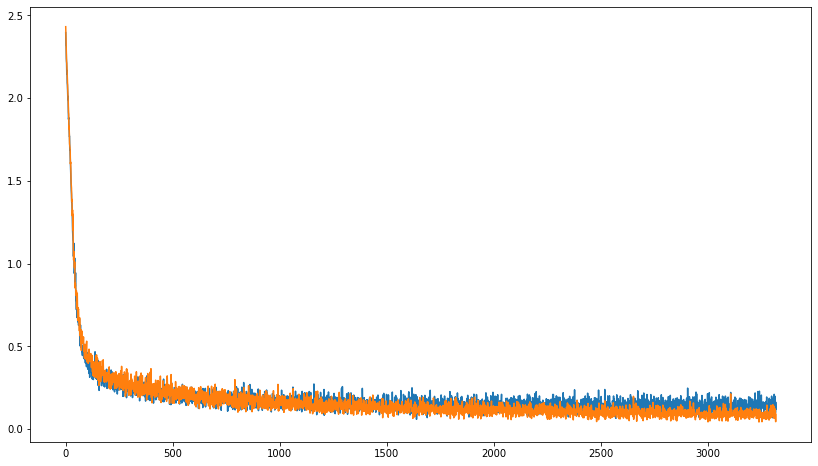

In [13]:
plt.figure(figsize=(14,8))
plt.plot(list_loss_eval)
plt.plot(list_loss_train)

<h1>Keras</h1>

In [14]:
# O clear_session é passado para apagar o grafo e seus pesos antes de rodar o modelo novamente.
# O clear_session não funciona corretamente no TensorFlow.

keras.backend.clear_session()
model = Sequential()

In [15]:
model.add(Dense(num_hidden, activation="relu", input_shape=(num_input,)))
model.add(Dense(num_hidden * 2, activation="relu"))
model.add(Dense(num_out, activation="softmax"))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.adam(),
              metrics=["accuracy"])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                12560     
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 13,434
Trainable params: 13,434
Non-trainable params: 0
_________________________________________________________________


In [16]:
X_train = mnist.train.images
y_train = mnist.train.labels
X_eval = mnist.validation.images
y_eval = mnist.validation.labels
history = model.fit(X_train, y_train, batch_size, epochs, validation_data=[X_eval, y_eval])

Instructions for updating:
Use tf.cast instead.
Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 0s 5us/step - loss: 1.2417 - acc: 0.6282 - val_loss: 0.5066 - val_acc: 0.8598
Epoch 2/30
55000/55000 [==============================] - 0s 3us/step - loss: 0.4147 - acc: 0.8843 - val_loss: 0.3242 - val_acc: 0.9104
Epoch 3/30
55000/55000 [==============================] - 0s 3us/step - loss: 0.3186 - acc: 0.9087 - val_loss: 0.2731 - val_acc: 0.9242
Epoch 4/30
55000/55000 [==============================] - 0s 3us/step - loss: 0.2793 - acc: 0.9199 - val_loss: 0.2457 - val_acc: 0.9284
Epoch 5/30
55000/55000 [==============================] - 0s 3us/step - loss: 0.2547 - acc: 0.9268 - val_loss: 0.2279 - val_acc: 0.9342
Epoch 6/30
55000/55000 [==============================] - 0s 3us/step - loss: 0.2361 - acc: 0.9331 - val_loss: 0.2138 - val_acc: 0.9372
Epoch 7/30
55000/55000 [==============================] - 0s 3us/step - loss: 0.2237 - 

In [17]:
predict = model.predict(mnist.test.images)

In [18]:
predict = np.argmax(predict, axis=1)

In [19]:
predict

array([7, 2, 1, ..., 4, 5, 6])

In [20]:
y_test = np.argmax(mnist.test.labels, axis=1)

In [21]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.98      0.99      0.98      1135
           2       0.97      0.95      0.96      1032
           3       0.95      0.94      0.95      1010
           4       0.95      0.97      0.96       982
           5       0.94      0.93      0.94       892
           6       0.97      0.96      0.96       958
           7       0.96      0.96      0.96      1028
           8       0.93      0.93      0.93       974
           9       0.97      0.93      0.95      1009

   micro avg       0.96      0.96      0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



In [22]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

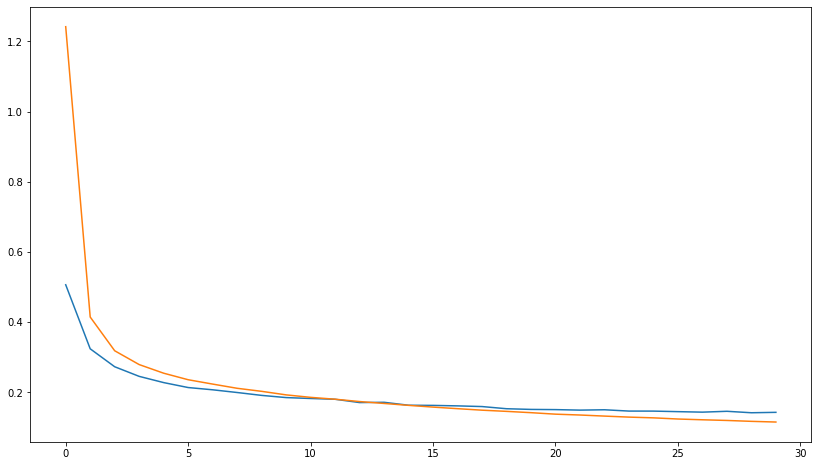

In [23]:
plt.figure(figsize=(14,8))
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])